# sim_study_comparison_varying data

## preamble

In [9]:
# importing numpy
import numpy as np
from numpy import random

In [10]:
# importing plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [11]:
# importing storage for results
import zarr

In [12]:
# importing pandas
import pandas as pd

## simulated data

In [13]:
# loading in functions for simulation
%run '../../function_scripts/model/UC_simulation.py'

In [14]:
# importing the csv - only the important columns
data_real = pd.read_csv("../../Antidote_household.csv", usecols=["hid","pid","date","age","sex","hiv","hivChild","cpt","result","week"])

# converting the pid to integers (and saving lists of sex and age)
pid_unique = []
no_individuals = 0
test_individuals = []
sex = []
age = []
for i in range(1659):
    pid = data_real['pid'][i]
    if pid in pid_unique:
        test_individuals.append(pid_unique.index(pid))
    else:
        pid_unique.append(pid)
        test_individuals.append(no_individuals)
        sex.append(data_real['sex'][i])
        age.append(data_real['age'][i])
        no_individuals += 1
sex = np.array(sex)
age = np.array(age)

# centring age and sex
age = age - np.mean(age)
sex = sex - np.mean(sex)

# calculating N and T
N = no_individuals
T = int(max(data_real['week']))

# making a test result matrix (for the real test results)
test_results_real = np.tile(np.nan,(T+1,N))
for i in range(1659):
    j = test_individuals[i]
    t = int(data_real['week'][i])
    test_results_real[t,j] = data_real['result'][i]

# converting the hid to integers
hid_unique = []
no_houses = 0
test_houses = []
for hid in data_real['hid'] :
    if hid in hid_unique:
        test_houses.append(hid_unique.index(hid))
    else:
        hid_unique.append(hid)
        test_houses.append(no_houses)
        no_houses += 1

# list of which house each individual is in
house_list = []
for i in range(N):
    test_no = test_individuals.index(i)
    house_list.append(test_houses[test_no])

# making a household mixing matrix
h = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if house_list[i]==house_list[j]:
            h[i,j] = 1

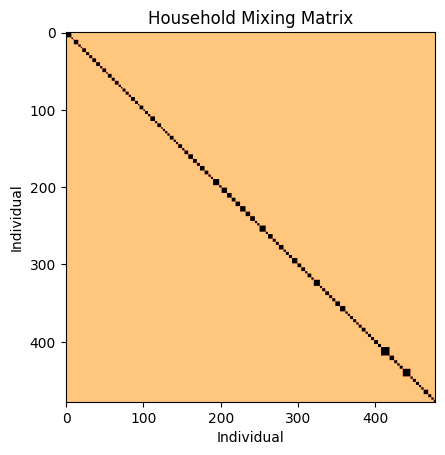

In [15]:
# plotting h
plt.imshow(h,cmap="copper_r")
plt.title("Household Mixing Matrix")
plt.ylabel("Individual")
plt.xlabel("Individual")
plt.show()

In [18]:
# true values of the paramters
theta = np.array([0.1,1.5,0,0])

In [19]:
# true values of other inputs
prop_0 = 0.3
gamma = 0.5
test_rate = 0.3 #will be replaced with other test data, but parameter needed for simulation
sens = 0.95
spec = 0.999

In [20]:
# seasonality modifiers
seasonality_mode = 2
seasonal_period = 52
t_ast = 17

# resulting matrices
seasonal_vector = np.array([1 - np.cos(2*np.pi*(t+t_ast)/seasonal_period) for t in range(T+1)])
seasonal_matrix_G = np.tile(seasonal_vector, (N,1)).T
seasonal_matrix_H = np.tile(1, (T+1,N))

In [21]:
# simulating the data
UC_results_01 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.05,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_02 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.10,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_03 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.15,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_04 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.20,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_05 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.25,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_06 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.30,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_07 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.35,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_08 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.40,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_09 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.45,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results_10 = UC_sim(N,h,age,sex,prop_0,theta,gamma,0.50,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

## inference information

In [22]:
# hyperparameters of priors
mu = np.array([0.001,0.001,0.001,0.001])
prior_X_0 = 0.3

In [23]:
# starting values
theta_start = np.array([0.5,0.5,0,0])
X_start = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)['X']
covariance_start = 0.8*0.000001*np.identity(4)
scaling = 0.8

In [24]:
# MCMC iterations
K = 1000
K_latent = 100

## rippler

### acceptance rates

In [8]:
# importing the saved acceptance rates
MCMC_noncentred_acc_01 = zarr.open('./MCMC_output/rippler_01/acc.zarr', mode='r')
MCMC_noncentred_acc_02 = zarr.open('./MCMC_output/rippler_02/acc.zarr', mode='r')
MCMC_noncentred_acc_03 = zarr.open('./MCMC_output/rippler_03/acc.zarr', mode='r')
MCMC_noncentred_acc_04 = zarr.open('./MCMC_output/rippler_04/acc.zarr', mode='r')
MCMC_noncentred_acc_05 = zarr.open('./MCMC_output/rippler_05/acc.zarr', mode='r')
MCMC_noncentred_acc_06 = zarr.open('./MCMC_output/rippler_06/acc.zarr', mode='r')
MCMC_noncentred_acc_07 = zarr.open('./MCMC_output/rippler_07/acc.zarr', mode='r')
MCMC_noncentred_acc_08 = zarr.open('./MCMC_output/rippler_08/acc.zarr', mode='r')
MCMC_noncentred_acc_09 = zarr.open('./MCMC_output/rippler_09/acc.zarr', mode='r')
MCMC_noncentred_acc_10 = zarr.open('./MCMC_output/rippler_10/acc.zarr', mode='r')

# printing the acceptance rates
print(MCMC_noncentred_acc_01[2],MCMC_noncentred_acc_02[2],MCMC_noncentred_acc_03[2],MCMC_noncentred_acc_04[2],MCMC_noncentred_acc_05[2],MCMC_noncentred_acc_06[2],MCMC_noncentred_acc_07[2],MCMC_noncentred_acc_08[2],MCMC_noncentred_acc_09[2],MCMC_noncentred_acc_10[2])

# removing the acceptance rates from memory
del(MCMC_noncentred_acc_01)
del(MCMC_noncentred_acc_02)
del(MCMC_noncentred_acc_03)
del(MCMC_noncentred_acc_04)
del(MCMC_noncentred_acc_05)
del(MCMC_noncentred_acc_06)
del(MCMC_noncentred_acc_07)
del(MCMC_noncentred_acc_08)
del(MCMC_noncentred_acc_09)
del(MCMC_noncentred_acc_10)

0.48914 0.37032 0.30578 0.25792 0.2202 0.1917 0.16915 0.14426 0.12933 0.11155


### MSJDs

In [27]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_01/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

317.079


In [28]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_02/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

157.201


In [29]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_03/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

102.874


In [30]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_04/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

72.709


In [31]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_05/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

54.591


In [32]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_06/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

43.026


In [33]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_07/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

34.769


In [34]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_08/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

27.571


In [35]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_09/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

22.888


In [36]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/rippler_10/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

18.588


## move/add/delete

### acceptance rates

In [ ]:
# importing the saved acceptance rates
MCMC_block_acc_01 = zarr.open('./MCMC_output/block_01/acc.zarr', mode='r')
MCMC_block_acc_02 = zarr.open('./MCMC_output/block_02/acc.zarr', mode='r')
MCMC_block_acc_03 = zarr.open('./MCMC_output/block_03/acc.zarr', mode='r')
MCMC_block_acc_04 = zarr.open('./MCMC_output/block_04/acc.zarr', mode='r')
MCMC_block_acc_05 = zarr.open('./MCMC_output/block_05/acc.zarr', mode='r')
MCMC_block_acc_06 = zarr.open('./MCMC_output/block_06/acc.zarr', mode='r')
MCMC_block_acc_07 = zarr.open('./MCMC_output/block_07/acc.zarr', mode='r')
MCMC_block_acc_08 = zarr.open('./MCMC_output/block_08/acc.zarr', mode='r')
MCMC_block_acc_09 = zarr.open('./MCMC_output/block_09/acc.zarr', mode='r')
MCMC_block_acc_10 = zarr.open('./MCMC_output/block_10/acc.zarr', mode='r')

# printing the acceptance rates
print(MCMC_block_acc_01[2],MCMC_block_acc_02[2],MCMC_block_acc_03[2],MCMC_block_acc_04[2],MCMC_block_acc_05[2],MCMC_block_acc_06[2],MCMC_block_acc_07[2],MCMC_block_acc_08[2],MCMC_block_acc_09[2],MCMC_block_acc_10[2])

# removing the acceptance rates from memory
del(MCMC_block_acc_01)
del(MCMC_block_acc_02)
del(MCMC_block_acc_03)
del(MCMC_block_acc_04)
del(MCMC_block_acc_05)
del(MCMC_block_acc_06)
del(MCMC_block_acc_07)
del(MCMC_block_acc_08)
del(MCMC_block_acc_09)
del(MCMC_block_acc_10)

0.44093 0.40965 0.37699 0.34685 0.32082 0.29548 0.28071 0.25495 0.2349 0.21319


### MSJDs

In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_01/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

68.194


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_02/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

60.587


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_03/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

53.348


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_04/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

47.116


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_05/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

42.442


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_06/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

38.467


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_07/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

34.787


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_08/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

31.369


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_09/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

27.348


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/block_10/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

23.941


## iFFBS

### acceptance rates

In [ ]:
# none since Gibbs sampler

### MSJDs

In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_01/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1500.968


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_02/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1401.196


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_03/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1289.432


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_04/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1214.513


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_05/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1112.933


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_06/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1043.562


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_07/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

969.794


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_08/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

907.735


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_09/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

835.268


In [ ]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/iFFBS_10/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(999):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

764.119


## plots

In [40]:
accept_rippler = np.array([0.48914, 0.37032, 0.30578, 0.25792, 0.2202, 0.1917, 0.16915, 0.14426, 0.12933, 0.11155])
accept_block = np.array([0.44093, 0.40965, 0.37699, 0.34685, 0.32082, 0.29548, 0.28071, 0.25495, 0.2349, 0.21319])
MSJD_rippler = np.array([317.079, 157.201, 102.874, 72.709, 54.591, 43.026, 34.769, 27.571, 22.888, 18.588])
MSJD_block = np.array([68.194, 60.587, 53.348, 47.116, 42.442, 38.467, 34.787, 31.369, 27.348, 23.941])
test_quantities = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])

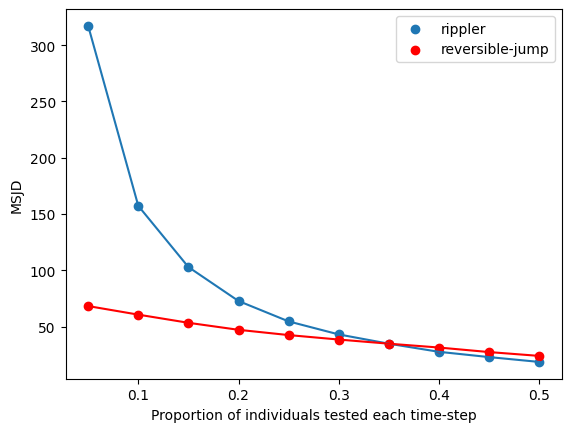

In [51]:
plt.plot(test_quantities, MSJD_rippler)
plt.plot(test_quantities, MSJD_block, color="red")
plt.scatter(test_quantities, MSJD_rippler, label="rippler")
plt.scatter(test_quantities, MSJD_block, color="red", label="reversible-jump")
plt.legend()
plt.ylabel("MSJD")
plt.xlabel("Proportion of individuals tested each time-step")
#plt.savefig("plots/MSJD_vs_tests.pdf")
plt.show()

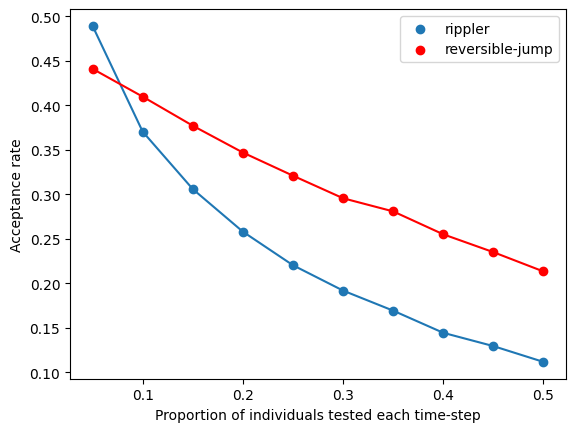

In [52]:
plt.plot(test_quantities, accept_rippler)
plt.plot(test_quantities, accept_block, color="red")
plt.scatter(test_quantities, accept_rippler, label="rippler")
plt.scatter(test_quantities, accept_block, color="red", label="reversible-jump")
plt.legend()
plt.ylabel("Acceptance rate")
plt.xlabel("Proportion of individuals tested each time-step")
#plt.savefig("plots/accept_vs_tests.pdf")
plt.show()